## Aula 03 - Filtragem espacial utilizando operador de convolução

In [58]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

A filtragem espacial de imagens utiliza um elemento (filtro) para realizar operações que considerem não apenas o pixel atual, mas também outros pixels da imagem, comumente de acordo com uma vizinhança local (ou seja, pixels com coordenadas similares à do pixel sendo processado).

Há métodos conhecidos como de *filtragem não-local* que operam sobre pixels distan distantes em termos de coordenadas, mas próximos com relação à similaridade de intensidade. Esses métodos tem resultados interessantes, mas não abordaremos nesse documento.

A operação matemática que define a filtragem espacial local é conhecida por **convolução**, dada pelo operador asterisco ou estrela `*` (é importante diferenciar esse de um simples produto, que em notação matemática não é dado por esse mesmo símbolo):

$$ g = w * f$$

A equação acima significa que uma nova imagem *g* é obtida pela convolução do filtro *w* com a imagem de entrada *f*

Para filtrar um pixel na imagem *f* centrado na coordenada *(x,y)*, produzindo um novo pixel *g(x,y)*, temos:

$$ g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) \cdot f(x-s, y-t)$$

A idéia dessa equação é que o filtro *w* tenha dimensões diferentes de *f*. Vamos dizer que *w* tem tamanho `m x n` e que *f* tenha tamanho `M x N`.

Outra questão importante é que a equação assume que o filtro *w* é centrado na posição *(0,0)*. Isso complica um pouco a equação, mas na prática a operação é bem simples.

Para que a equação anterior funcione é preciso que *m = 2a+1* e *n = 2b+1*

Vamos ver um exemplo com uma matrizes pequenas a seguir


In [59]:
# imagem aleatoria 'f' de tamanho 5x5
np.random.seed(8)
f = np.random.randint(0,7,[5,5])
print(f)


[[3 4 1 1 5]
 [2 0 3 0 0]
 [5 5 4 1 3]
 [2 3 4 5 1]
 [5 5 2 3 2]]


In [60]:
# filtro w de tamanho 3x3
w = np.matrix([[1, 2, 0], [1, 4, 0], [0, 0, 0]])/8.0
print(w)

[[0.125 0.25  0.   ]
 [0.125 0.5   0.   ]
 [0.    0.    0.   ]]


Desejamos calcular a convolução de w por f, produzindo uma nova matriz/imagem *g*. Para isso vamos computar apenas o valor de um pixel de *g*, por exemplo *g(1,2)*. Note que *f(1,2) = 1*.

O fitro tem tamanho `3 x 3`, e portanto sabendo que *m=n* e que *m = 2a+1* e *n = 2b+1*, encontramos *a* e *b*:
$$ 3 = 2a + 1$$
$$ 2a= 3 - 1$$
$$ a = \frac{2}{2} = 1 $$

Ou de forma geral:
$$ n = 2a + 1$$
$$ 2a= n - 1$$
$$ a = \frac{n-1}{2} $$

Assim:

$$ g(1,2) = \sum_{s=-1}^{1} \sum_{t=-1}^{1} w(s,t) \cdot f(1-s, 2-t)$$

Lembre que a equação considera que o centro do filtro *w* está na posicao (0,0), sendo seus **índices** dados por:

$$ \begin{bmatrix}
 (-1,-1) & (-1,0) & (1, 1) \\ 
 (-1, 0) & (0, 0) & (1, 0) \\ 
 (-1, 1) & (0, 1) & (1, 1) 
\end{bmatrix}$$

Assim, na prática, o que a equação diz é que estamos pegando cada valor de w, multiplicando pela vizinhança de f(1,2) e somando tudo. 

O primeiro termo do somatório duplo seria para *t = -1* e *s = -1*:
$$ w(-1,-1) \cdot f(1-(-1),2-(-1)) = 0.125 \cdot f(2,3)$$

O segundo termo, t=-1, s=0:
$$ w(-1, 0) \cdot f(1-(-1),2-0) = 0.25 \cdot f(2,2)$$

O terceiro termo, t=-1, s=1:
$$ w(-1, 1) \cdot f(1-(-1),2-1) = 0.0 \cdot f(2,1)$$

E assim por diante. Note que os valores do filtro são referentes à **linha 1** do filtro: `[0.125, 0.25 , 0.0  ]`

Esses valores estão sendo multiplicados por valores na **linha 2** da imagem porém em ordem invertida, nas posiçoes (2,3), (2,2) e (2,1) relativas aos valores: `[0, 1, 6]` (procure esse padrão na imagem, note que está invertido devido à subtração 1-s e 2-t da equação da convolução)

Assim, a convolução realiza a multiplicação ponto a ponto entre os pixels da imagem, centrados em (x,y), e os valores do filtro **invertido** em x e y.

Podemos facilitar a implementação realizando essa inversão (*flip*) no filtro primeiro:

In [61]:
wf = np.flip( np.flip(w,0) , 1)
print(wf)

[[0.    0.    0.   ]
 [0.    0.5   0.125]
 [0.    0.25  0.125]]


Agora podemos fazer a implementação ponto a ponto, centrada em (x,y)

In [62]:
# sabendo que queremos calcular g(1,2), podemos extrair a matriz a ser multiplicada pelo filtro:
x = 1
y = 2
# lembre que em Python quando fazemos o intervalo a:b ele gera a sequência [a, a+1, a+2, ..., b-2, b-1]
# vamos verificar se a submatriz esta correta:
print(f[ x-1:x+2 , y-1:y+2 ])

[[4 1 1]
 [0 3 0]
 [5 4 1]]


In [63]:
# primeiramente fazemos a multiplicacao ponto-a-ponto
conv1 = np.multiply(f[ x-1:x+2 , y-1:y+2 ], wf)
conv1

matrix([[0.   , 0.   , 0.   ],
        [0.   , 1.5  , 0.   ],
        [0.   , 1.   , 0.125]])

In [64]:
# e entao fazemos a soma, obtendo o valor em g(1,2)
g_1_2 = np.sum(conv1)
g_1_2

2.625

In [65]:
# essa soma pode ser convertida para inteiro truncando o valor (operacao floor)
g_1_2 = int(np.sum(conv1))
g_1_2

2

In [84]:
# com isso, podemos implementar nossa propria funcao que realiza convolucao em um ponto
# vamos assumir aqui que o filtro w tem tamanho n,m impar!
def conv_point(f, w, x, y, debug=False):
    n,m = w.shape
    a = int((n-1)/2)
    b = int((m-1)/2)
    # obtem submatriz a ser usada na convolucao
    sub_f = f[ x-a : x+a+1 , y-b:y+b+1 ]

    # obtem filtro invertido
    w_flip = np.flip( np.flip(w, 0) , 1)
    
    # aqui imprime sub_f e w_flip se debug=True
    if (debug==True):
        print("sub-image f:\n" + str(sub_f))
        print("\nflipped filter w:\n" + str(w_flip))
    
    value = np.sum( np.multiply(sub_f, w_flip))
    return value
    

In [85]:
# testando para a coordenada (3,1)
conv_point(f, w, 3, 1)

3.5

Parece que funciona. Agora conseguimos computar para TODOS os valores de uma imagem *f* gerando a imagem *g* convoluida com o filtro *w*?

In [86]:
# vamos implementar uma funcao que executa convolucao para todos os pixels (x,y) da imagem
def image_convolution(f, w, debug=False):
    N,M = f.shape
    
    # cria nova imagem g, vazia
    g = np.empty(f.shape, dtype=np.uint8)
    
    # para cada pixel:
    for x in range(N):
        for y in range(M):
            g[x,y] = conv_point(f, w, x, y, debug).astype(np.uint8)


In [87]:
# vamos tentar aplicar na matriz f
g = image_convolution(f, w)

ValueError: operands could not be broadcast together with shapes (0,0) (3,3) 

Qual será o problema? Parecia estar tudo certo! Vamos tentar usar a opção Debug para olhar as matrizes e filtros gerados

In [89]:
g = image_convolution(f, w, debug=True)

sub-image f:
[]

flipped filter w:
[[0.    0.    0.   ]
 [0.    0.5   0.125]
 [0.    0.25  0.125]]


ValueError: operands could not be broadcast together with shapes (0,0) (3,3) 

Note que o programa nao conseguiu gerar uma subimagem f para f(0,0), porque tentou acessar índices **negativos**. Por exemplo para o filtro que projetamos, a = 1 e b =1, então a submatriz é dada por:
    
`sub_f = f[ x-a : x+a+1 , y-b : y+b+1 ] 
       = f[ 0-1 : 0+1+1 , 0-1 : 0-1+1 ]
       = f[  -1 : 2     ,  -1 : 2     ]`

O cálculo dos intervalos incluem regiões de f com índices -1 na linha e coluna, o que é impossível. 
Assim não é possível computar a convolução para esses pixels, devemos portanto percorrer a imagem para os pixels 

x de 0+a até N-a

y de 0+b até M-b

Ignorando os pixels das bordas. E já que vamos alterar as funções, podemos computar o *flipped filter* apenas uma vez, e fazer uma função de convolução da imagem auto-contida:

In [90]:
# vamos implementar uma funcao que executa convolucao para todos os pixels (x,y) da imagem
def image_convolution(f, w, debug=False):
    N,M = f.shape
    n,m = w.shape
    
    a = int((n-1)/2)
    b = int((m-1)/2)

    # obtem filtro invertido
    w_flip = np.flip( np.flip(w, 0) , 1)

    g = np.zeros(f.shape, dtype=np.uint8)

    # para cada pixel:
    for x in range(a,N-a):
        for y in range(b,M-b):
            # obtem submatriz a ser usada na convolucao
            sub_f = f[ x-a : x+a+1 , y-b:y+b+1 ]
            if (debug==True):
                print(str(x)+","+str(y)+" - subimage:\n"+str(sub_f))
            # calcula g em x,y
            g[x,y] = np.sum( np.multiply(sub_f, w_flip)).astype(np.uint8)

    return g

In [91]:
g = image_convolution(f, w)
print(g)

[[0 0 0 0 0]
 [0 2 2 0 0]
 [0 4 3 2 0]
 [0 3 3 3 0]
 [0 0 0 0 0]]


Mas será que não há alternativas?

**Zero-padding**: é o processo de expandir a imagem e preencher as bordas por zeros, permitindo computar a convolução em todos os pontos da imagem. Após processar a convolução, cortamos g para que tenha o mesmo tamanho original de f. Esse processo será deixado como exercício

### Aplicando filtros em imagens

In [107]:
img1 = imageio.imread("imagens/pattern.png")
img2 = imageio.imread("imagens/gradient_noise.png")
img3 = imageio.imread("imagens/board.jpg")

In [93]:
# filtro de média 3x3 (simétrico) que considera a 4-vizinhança
w_med = np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
print(w_med)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


(-0.5, 319.5, 319.5, -0.5)

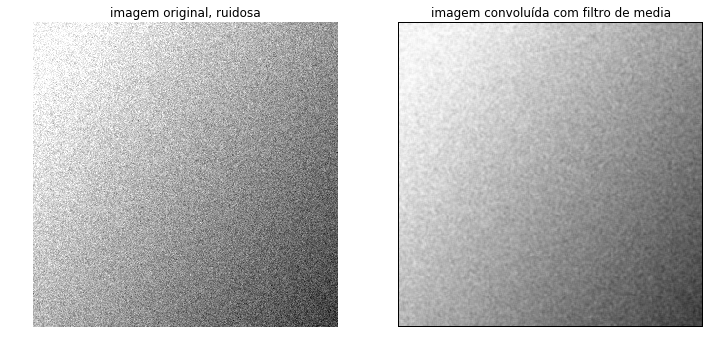

In [94]:
img2_media = image_convolution(img2, w_med)

# exibindo imagem original e filtrada por w_med
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.title("imagem original, ruidosa")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2_media, cmap="gray", vmin=0, vmax=255)
plt.title("imagem convoluída com filtro de media")
plt.axis('off')

Note que a imagem da direita tem uma borda com pixels pretos (valor 0) - isso ocorre porque não processamos os *a* pixels da borda, dado por:
$a = (m-1)/2$,
onde *m* é o tamanho do filtro. Nesse caso *a = 1* e portanto a borda com valores 0 tem 1 pixel.

Por exemplo, se aplicarmos um filtro maior, de tamanho 7, então teremos 3 pixels de borda.

A seguir daremos outros exemplos de filtro, incluindo filtros diferenciais e também um exemplo de filtro aleatório.

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


(-0.5, 255.5, 255.5, -0.5)

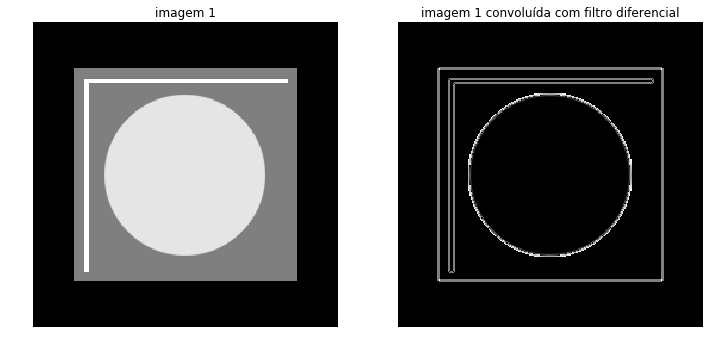

In [111]:
w_diff = np.matrix([[ 0, -1,  0], 
                    [-1,  4, -1], 
                    [ 0, -1,  0]])
print(w_diff)

img1_diff = image_convolution(img1, w_diff)

# exibindo imagem 1 e filtrada por w_diff
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_diff, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1 convoluída com filtro diferencial")
plt.axis('off')

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


(-0.5, 255.5, 255.5, -0.5)

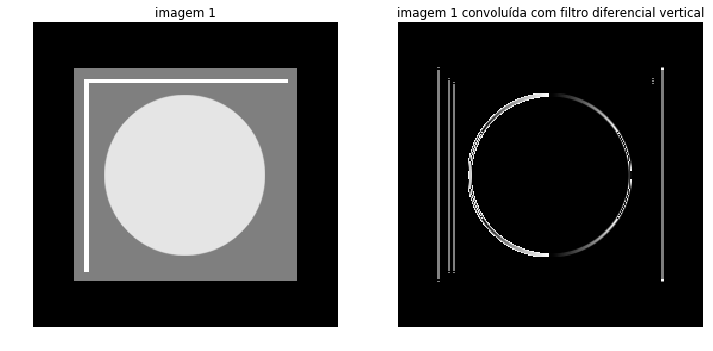

In [112]:
w_vert = np.matrix([[-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])
print(w_vert)

img1_vert = image_convolution(img1, w_vert)

# exibindo imagem 1 e filtrada por w_diff
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_vert, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1 convoluída com filtro diferencial vertical")
plt.axis('off')

[[0.33316762 0.54656492 0.97575136 0.83667391 0.73553932 0.19896959
  0.14028696]
 [0.30875724 0.58962589 0.44611399 0.59465294 0.45096877 0.17939277
  0.62955293]
 [0.98478683 0.64281336 0.42024069 0.73130064 0.34213929 0.7267742
  0.27337561]
 [0.00472373 0.76180785 0.40168523 0.59680747 0.28540935 0.86308875
  0.12820937]
 [0.0182775  0.92258884 0.40745347 0.81833909 0.96987881 0.88253849
  0.53995286]
 [0.89007645 0.71247168 0.27255793 0.66154702 0.53245561 0.98014342
  0.66802317]
 [0.67246202 0.56110297 0.19618636 0.16917273 0.97474098 0.20852144
  0.52937305]]


(-0.5, 499.5, 464.5, -0.5)

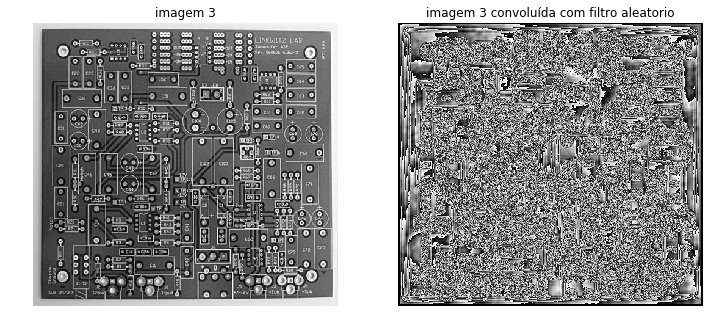

In [114]:
# filtro de valores aleatorios 7x7
w_rand = np.random.random([7,7])
print(w_2)
img3_wrand = image_convolution(img3, w_rand)

# exibindo imagem 3 e filtrada por w_2 aleatorio
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 3")
plt.axis('off')
plt.subplot(122)
plt.imshow(img3_wrand, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 3 convoluída com filtro aleatorio")
plt.axis('off')

Note que um filtro aleatório não gera uma imagem útil do ponto de vista de sua visualização, ou ainda do realce de suas características.

Assim, o projeto de um filtro deve ser pensado em termos de qual tipo de realce de características visuais desejamos para a imagem.

Há dois tipos bastante utilizados de filtros: os de **suavização**, que reduzem a variância da imagem e portanto removem transições, ruído e textura, e os **diferenciais** que funcionam na forma de derivadas da imagem, realçando transições, ruído e texturas.

Inspecione os filtros implementados anteriormente, e tente classificá-los em termos desses dois tipos.